In [ ]:
#TESLA Stock Price Prediction using Facebook Prophet
#Now we will build a Facebook Prophet Machine learning model to forecast the price of Tesla 30 days into the future. 
#We will also visualize the historical performance of Tesla and evaluate the performance of our model.

In [1]:
## import the libraries

# pandas- Data Manipulation and Analysis
# fbprophet- Forecasting Time Series Data
# plotly- Data Visualization

import pandas as pd
import plotly.express as pe
from fbprophet import Prophet

## Importing dataset from Yahoo Finance

In [2]:
# Importing data downloaded from yahoo finance using Pandas
df=pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-26,411.630005,425.760010,410.000000,420.279999,420.279999,28239200
1,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500
2,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
3,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
4,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
...,...,...,...,...,...,...,...
246,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200
247,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100
248,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100
249,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,679.645817,692.774979,665.658327,680.290995,680.290995,3.044849e+07
std,108.930479,109.662604,108.661186,109.361375,109.361375,1.850540e+07
min,394.000000,406.980011,379.109985,388.040009,388.040009,9.800600e+06
25%,620.184998,633.149994,604.024994,623.510010,623.510010,1.978670e+07
50%,682.849976,695.770020,668.500000,679.820007,679.820007,2.637060e+07
75%,742.834992,755.664978,731.940002,743.559998,743.559998,3.544435e+07
max,895.500000,910.000000,890.960022,909.679993,909.679993,2.221262e+08


### Used Close price for our analysis and viz as it is the most accurate representaion.

## Data Visualization using Plotly Express

##### Plotting the data as a line plot to see seasonality and stationarity

In [6]:
# Visualizing the Close Price using a Line Graph.

pe.line(df,x="Date",y="Close")

In [7]:
# Visualizing the Volume of Stocks with Area Graph

pe.area(df,x='Date',y='Volume')

### The stock volume was high in december 2020 as TESLA did S&P 500 debut on dec 21.

In [8]:
pe.box(df,y='Close')

### Using FBProphet to forecast the data for next 30 days for Tesla


In [14]:
# Taking Date and Close column from the df dataframe for predictions.

column=['Date','Close']
df1=pd.DataFrame(df,columns=column)
df1

,Date,Close
0,2020-10-26,420.279999
1,2020-10-27,424.679993
2,2020-10-28,406.019989
3,2020-10-29,410.829987
4,2020-10-30,388.040009
...,...,...
246,2021-10-18,870.109985
247,2021-10-19,864.270020
248,2021-10-20,865.799988
249,2021-10-21,894.000000


In [15]:
#Renaming the df1 because the input to Prophet is always a dataframe with two columns: ds and y

prophet_df=df1.rename(columns={'Date':'ds','Close':'y'})
prophet_df

,ds,y
0,2020-10-26,420.279999
1,2020-10-27,424.679993
2,2020-10-28,406.019989
3,2020-10-29,410.829987
4,2020-10-30,388.040009
...,...,...
246,2021-10-18,870.109985
247,2021-10-19,864.270020
248,2021-10-20,865.799988
249,2021-10-21,894.000000


### Creating a Model to Predict the future price.

In [25]:
## Creating Facebook Prophet Model

model=Prophet()
model.fit(prophet_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Creating the future dataset with the help of the Prophet so that we make predictions on unseen data

In [52]:
# create a new dataframe called future 

future_price=model.make_future_dataframe(periods=60)


In [53]:
df1.tail()

,Date,Close
246,2021-10-18,870.109985
247,2021-10-19,864.270020
248,2021-10-20,865.799988
249,2021-10-21,894.000000
250,2021-10-22,909.679993


In [54]:
future_price.tail()

,ds
306,2021-12-17
307,2021-12-18
308,2021-12-19
309,2021-12-20
310,2021-12-21


### Making predictions

In [50]:
forecast=model.predict(future_price)


In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-26,385.853590,329.743721,428.567259,385.853590,385.853590,-9.079394,-9.079394,-9.079394,-9.079394,-9.079394,-9.079394,0.0,0.0,0.0,376.774196
1,2020-10-27,391.149958,335.717407,437.304458,391.149958,391.149958,-5.069298,-5.069298,-5.069298,-5.069298,-5.069298,-5.069298,0.0,0.0,0.0,386.080659
2,2020-10-28,396.446325,336.063927,440.521860,396.446325,396.446325,-6.903467,-6.903467,-6.903467,-6.903467,-6.903467,-6.903467,0.0,0.0,0.0,389.542858
3,2020-10-29,401.742692,345.888758,447.951864,401.742692,401.742692,-6.807868,-6.807868,-6.807868,-6.807868,-6.807868,-6.807868,0.0,0.0,0.0,394.934825
4,2020-10-30,407.039060,352.973782,456.552329,407.039060,407.039060,-4.551672,-4.551672,-4.551672,-4.551672,-4.551672,-4.551672,0.0,0.0,0.0,402.487387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2021-12-17,922.683767,857.159731,986.123718,875.484476,970.616316,-4.551672,-4.551672,-4.551672,-4.551672,-4.551672,-4.551672,0.0,0.0,0.0,918.132094
307,2021-12-18,924.374064,874.468441,1011.018141,875.889214,973.543240,16.205849,16.205849,16.205849,16.205849,16.205849,16.205849,0.0,0.0,0.0,940.579913
308,2021-12-19,926.064361,874.397080,1020.471203,876.766003,976.345445,16.205849,16.205849,16.205849,16.205849,16.205849,16.205849,0.0,0.0,0.0,942.270211
309,2021-12-20,927.754659,843.429356,991.069532,877.156254,979.258321,-9.079394,-9.079394,-9.079394,-9.079394,-9.079394,-9.079394,0.0,0.0,0.0,918.675265


##### Hereunder the predictions table, we are only concerned with ds, yhat_lower, yhat_upper, and yhat because these are the variables that will give us the predicted results with respect to the date specified.

yhat means the predicted output based on the input fed to the model, yhat_lower, and upper means the upper and lower value that can go based on the predicted output that is, the fluctuations that can happen.

In [30]:
pe.line(forecast,x='ds',y='yhat')

### Getting the desired columns:

In [58]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-26,376.774196,329.743721,428.567259
1,2020-10-27,386.080659,335.717407,437.304458
2,2020-10-28,389.542858,336.063927,440.521860
3,2020-10-29,394.934825,345.888758,447.951864
4,2020-10-30,402.487387,352.973782,456.552329
...,...,...,...,...
306,2021-12-17,918.132094,857.159731,986.123718
307,2021-12-18,940.579913,874.468441,1011.018141
308,2021-12-19,942.270211,874.397080,1020.471203
309,2021-12-20,918.675265,843.429356,991.069532


### Plotting the output

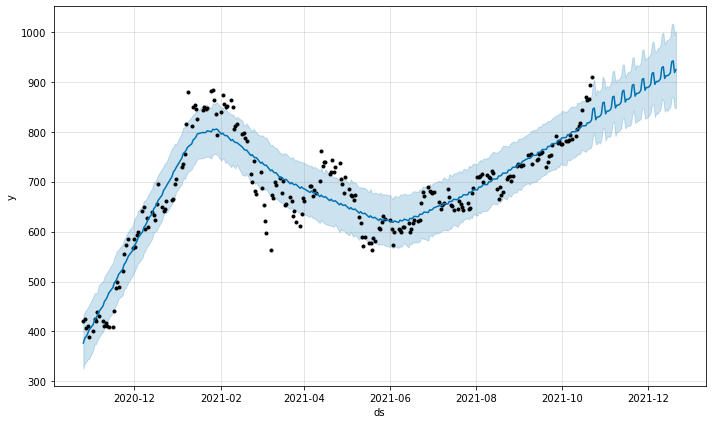

In [41]:
## using FBProphet inbuild tool for plotting
d=model.plot(forecast)

##### The model predicts the prices to fall in the coming time and thus it is a good selling opporutnity at this point.

### Checking the trends in the data

Below we can see the trends with respect to year and weeks in the year. The first graph represents an increasing trend as we progress in the years and the latter shows a fluctuating trend in the weekly price of Tesla. For some weeks it is low while for some it is high.

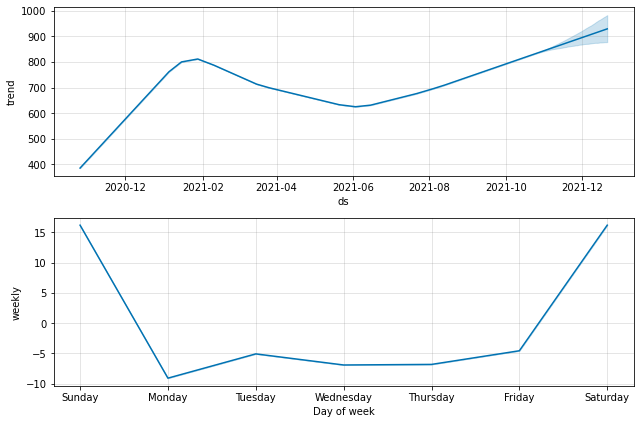

In [43]:
## visualize trends

figure=model.plot_components(forecast)

In [47]:
# Downloading the forecasted CSV data.
forecast.to_csv('/Users/vineetparekh/Desktop/python work/Price forecasting of Tesla/forecast_data.csv')
